In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
def analyies_sentiment(path, save_path):
    
    df = pd.read_csv(path, delimiter = '\t')
    # Create a DataFrame
    print("Original DataFrame:")
    print(df)

    # Drop the 'Number of sentence' column
    df = df.drop(['id'], axis=1)

    # Calculate the Number of Sentences for a particular sentiment
    number_sentences_particular_sentiment = df['sentiment'].value_counts().sort_index()
    print("\nNumber of Sentences per Sentiment:")
    print(number_sentences_particular_sentiment)

    # Calculate the average length of sentences per sentiment
    avg_length_by_sentiment = df.groupby('sentiment')['sentence'].apply(lambda x: x.str.len().mean()).reset_index()
    avg_length_by_sentiment.rename(columns={'sentence': 'Average Sentence Length'}, inplace=True)
    print("\nAverage Sentence Length by Sentiment:")
    print(avg_length_by_sentiment)

    # Function to calculate the average word count of a list of sentences
    def avg_word_count(sentence_list):
        word_counts = [len(re.findall(r'\w+', sentence)) for sentence in sentence_list]
        return sum(word_counts) / len(word_counts)

    # Calculate the average word count per sentiment
    avg_word_count_by_sentiment = df.groupby('sentiment')['sentence'].apply(avg_word_count).reset_index()
    avg_word_count_by_sentiment.rename(columns={'sentence': 'Average Word Count'}, inplace=True)
    print("\nAverage Word Count by Sentiment:")
    print(avg_word_count_by_sentiment)

    # Merge the datasets based on the common key 'sentiment'
    merged_data_dev = pd.merge(number_sentences_particular_sentiment, avg_length_by_sentiment, left_index=True, right_on='sentiment')
    merged_data_dev = pd.merge(merged_data_dev, avg_word_count_by_sentiment, left_on='sentiment', right_on='sentiment')
    print("\nMerged Data:")
    print(merged_data_dev)

    # Save the merged dataset to a new CSV file
    merged_data_dev.to_csv(save_path, index=False)

    # Create bar graphs
    fig, ax = plt.subplots(figsize=(10, 6))
    merged_data_dev.plot(x='sentiment', kind='bar', ax=ax)
    plt.title('Comparison of Sentiment Data')
    plt.xlabel('Sentiment')
    plt.ylabel('Count / Average Length / Average Word Count')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [3]:
def analysis_1_0(path, save_path):
    # Load the DataFrame from the file
    df = pd.read_csv(path, delimiter='\t')
    print("Original DataFrame:")
    print(df)

    # Calculate the occurrences of each value in the 'is_duplicate' column
    value_counts = df['is_duplicate'].value_counts()

    # Calculate the length of sentences and word count
    
    
    
    def length_without_dots(input_string):
        length = 0
        for char in input_string:
            if char != '.':
                length += 1
        return length


    
    
    print(df['sentence1'])
    df['sentence_length'] = length_without_dots(str(df['sentence1']))
    df['sentence_word_count'] = len(str(df['sentence1']).split())

    # Group the data by 'is_duplicate' and calculate averages
    grouped_data = df.groupby('is_duplicate').agg({
        'is_duplicate': 'count',
        'sentence_length': 'mean',
        'sentence_word_count': 'mean'
    }).rename(columns={'is_duplicate': 'Count', 'sentence_length': 'Average Sentence Length', 'sentence_word_count': 'Average Word Count'}).reset_index()

    print("\nGrouped Data:")
    print(grouped_data)

    # Create bar graphs
    ax = grouped_data.plot(x='is_duplicate', kind='bar', figsize=(10, 6))
    ax.set_xticklabels(['Not Duplicated', 'Duplicated'], rotation=0)
    plt.title('Comparison of Duplicated and Not Duplicated Sentences')
    plt.xlabel('Is Duplicated')
    plt.ylabel('Count / Average Length / Average Word Count')
    plt.legend(["Count", "Average Sentence Length", "Average Word Count"])
    plt.tight_layout()
    plt.show()

    # Save the grouped data to a new CSV file
    grouped_data.to_csv(save_path, index=False)

In [4]:
def analysis_similarity(path, save_path):
    path = 'sts-dev.csv'
    df = pd.read_csv(path, delimiter='\t')

    # Drop the 'id' column
    df = df.drop(['id'], axis=1)

    # Calculate the Number of Sentences for a particular similarity
    number_sentences_per_similarity = df['similarity'].value_counts().sort_index()

    # Calculate the average length of sentences per similarity
    avg_length_by_similarity = (
        df.groupby('similarity')
        .apply(lambda x: x[['sentence1', 'sentence2']].apply(lambda col: col.str.len().mean()))
        .reset_index()
        .rename(columns={'sentence1': 'Avg Sentence Length 1', 'sentence2': 'Avg Sentence Length 2'})
    )

    # Calculate the absolute difference in average sentence lengths
    avg_length_diff = abs(avg_length_by_similarity['Avg Sentence Length 1'] - avg_length_by_similarity['Avg Sentence Length 2'])

    # Create a new DataFrame for the differences in sentence lengths
    new_data = pd.DataFrame({
        'similarity': avg_length_by_similarity['similarity'],
        'Avg Sentence Length Difference': avg_length_diff
    })

    # Merge the number of sentences and the differences in sentence lengths
    merged_data = pd.merge(number_sentences_per_similarity.reset_index(), new_data, on='similarity')

    # Calculate the average number of similar words
    def similar_word_count(sentence1, sentence2):
        words1 = sentence1.split()
        words2 = sentence2.split()
        common_words = Counter(words1) & Counter(words2)
        return sum(common_words.values())

    result = []

    for similarity in df['similarity'].unique():
        similar_rows = df[df['similarity'] == similarity]
        avg_word_count = similar_rows.apply(lambda row: similar_word_count(row['sentence1'], row['sentence2']), axis=1).mean()
        result.append({'similarity': similarity, 'avg_word_count': avg_word_count})

    result_df = pd.DataFrame(result)
    result_df = result_df.sort_values(by='similarity')  # Sort by the 'similarity' column

    # Merge 'merged_data' and 'result_df'
    final_result = pd.merge(merged_data, result_df, on='similarity')
    print(final_result)



    # Set the figure size to enlarge the x-axis
    plt.figure(figsize=(100, 600))

    # Plot a bar graph
    final_result.plot(x='similarity', kind='bar')
    plt.ylabel('Values')  # Set y-axis label
    plt.xlabel('Similarity')  # Set x-axis label
    plt.title('Bar Graph of Final Result')  # Set title

    plt.show()  # Show the plot
    
    #save Data
    final_result.to_csv(save_path, index=False)

In [5]:
def uniq_values(path):
    # Load your dataset using pandas
    df = pd.read_csv(path, delimiter='\t')
    # Get the unique values in the last column (assuming it's the 'Name' column in this example)
    unique_values = sorted(set(df.iloc[:, -1]))  # Assuming the last column is the one you're interested in
    return unique_values

Original DataFrame:
      Unnamed: 0                         id   
0              0  a7d575c9ed86ea9633660c67e  \
1              1  33cfa32975091f471e3a19656   
2              2  266dc1a26e2654235e8d8dd22   
3              3  9ab97ed33b3aae716a099a622   
4              4  b9a4de27c4cb2a0f8fa220747   
...          ...                        ...   
1096        1096  7268beb9989f19b75e1395ec5   
1097        1097  54276f810c53354928acf961a   
1098        1098  a6744ae0fdcf6e2edf582f6c6   
1099        1099  8a5012744199a4ea506bc96df   
1100        1100  1ae91087064d5035fe6c0c63f   

                                               sentence  sentiment  
0      It 's a lovely film with lovely performances ...          3  
1      No one goes unindicted here , which is probab...          2  
2      And if you 're not nearly moved to tears by a...          3  
3                      A warm , funny , engaging film .          4  
4      Uses sharp humor and insight into human natur...          4  
.

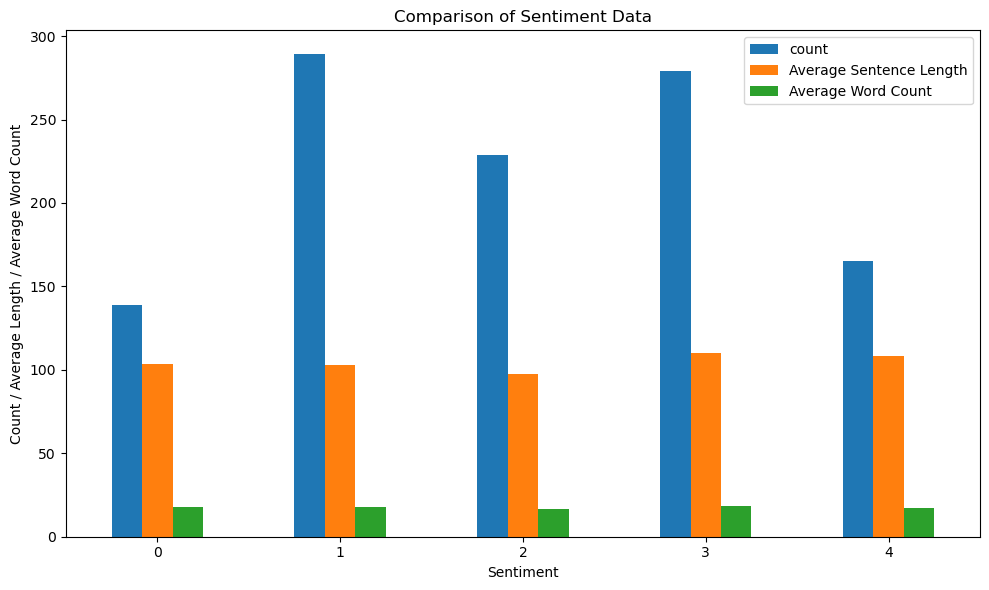

In [6]:
analyies_sentiment('ids-sst-dev.csv', 'Analysis_ids-sst-dev.csv')

Original DataFrame:
      Unnamed: 0                         id   
0              0  32a4f146782cbde1b7fa65799  \
1              1  6e0fb51a6fefc7c1b6d77a1d5   
2              2  9b1d25f272afcc21d4508f652   
3              3  40ad03c7e89899424ed723b96   
4              4  1ade8c062b919bec94fb66db9   
...          ...                        ...   
8539        8539  0e985aea48c6fb43641761bd5   
8540        8540  0c55fde1238b0a068cc30e44a   
8541        8541  c55e4c17dc18975f9e574c787   
8542        8542  a6d7e3b0643710275f4ed61b4   
8543        8543  69121a33e2470c0b0b28cceee   

                                               sentence  sentiment  
0      The Rock is destined to be the 21st Century '...          3  
1      The gorgeously elaborate continuation of `` T...          4  
2      Singer\/composer Bryan Adams contributes a sl...          3  
3      You 'd think by now America would have had en...          2  
4                  Yet the act is still charming here .          3  
.

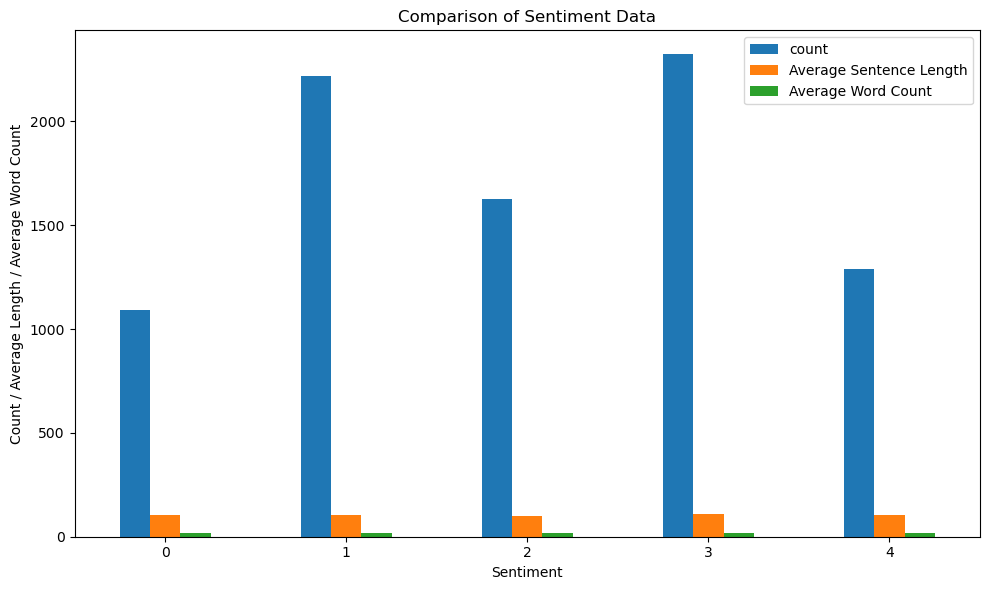

In [7]:
analyies_sentiment('ids-sst-train.csv', 'Analysis_ids-sst-train.csv')

Original DataFrame:
       Unnamed: 0                         id   
0          290564  fbfddc56315fb8a39e7608fa0  \
1          318737  318658e273ac78f3b1e957b8b   
2          400012  b229a7f7a7b661a8a92f970cf   
3          346961  6d1af8d3227bcb1f12e5fd17f   
4          103882  8e17f5f485c42beec87bbe341   
...           ...                        ...   
20209      287156  66a81f1fb357b3a02cf56af53   
20210      374866  97caffa7ec889385d3aa3a761   
20211      222710  d7111c39ead9759d48cd7cf4b   
20212      272833  d8511a7a0514299f18fcef14d   
20213      111373  43fb8a68c4664400b42db7f83   

                                               sentence1   
0       What can you get as a customer of Star Alliance?  \
1      "Which is correct grammar: I graduated from Un...   
2                                  What makes one angry?   
3      What can Trump realistically do for America (i...   
4      I have 95% in 10th, 95% in 12th and CGPA 7.8 i...   
...                                        

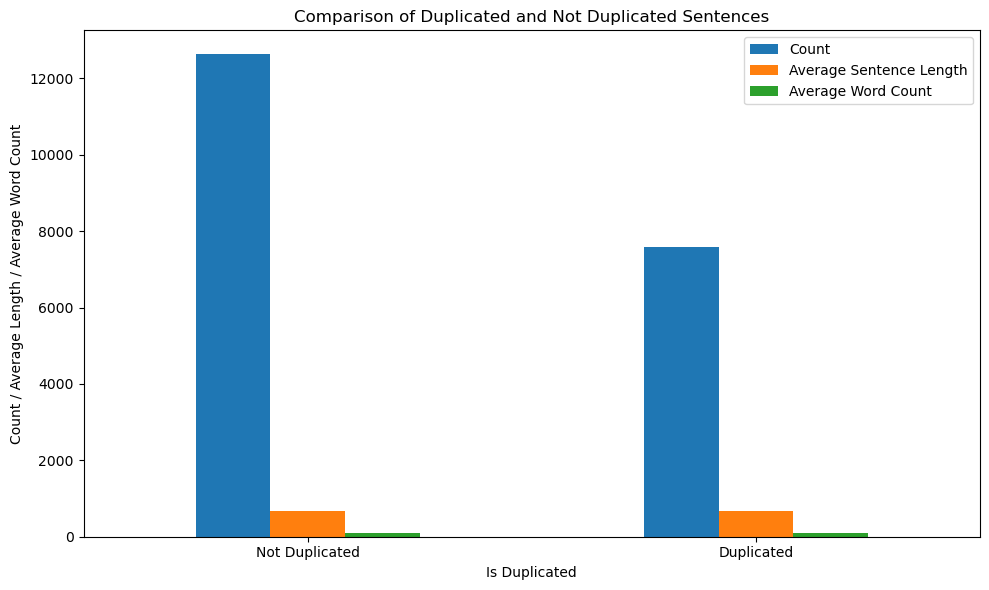

In [8]:
analysis_1_0('quora-dev.csv', 'Analysis_quora_dev.csv')

Original DataFrame:
        Unnamed: 0                         id   
0           321296  a4da64a4e943bf8b008d174ca  \
1           373075  f965ab2d29d51008ab3872f47   
2           213557  5aca073f4a977d55176f68572   
3           209343  a8abbd08d3401287da42acfb9   
4           389061  65dffaf8ac0ed7f3ebfcf0b02   
...            ...                        ...   
141501      402090  837a6b4ec23cabe215a141b15   
141502      376186  c1a62a4587067ed59be67855c   
141503      116568  a131d77690c3fd161914940b1   
141504       84800  652c65311af308afa9f257244   
141505      209926  4fd4acbc7b6471bfad73bb69d   

                                                sentence1   
0                    How can I master myself in geometry?  \
1         Can deleted pictures on Instagram be recovered?   
2       Who is the best prime minister India has ever ...   
3       What qualifications do I need to get a job in ...   
4                   In what situations is it okay to lie?   
...                      

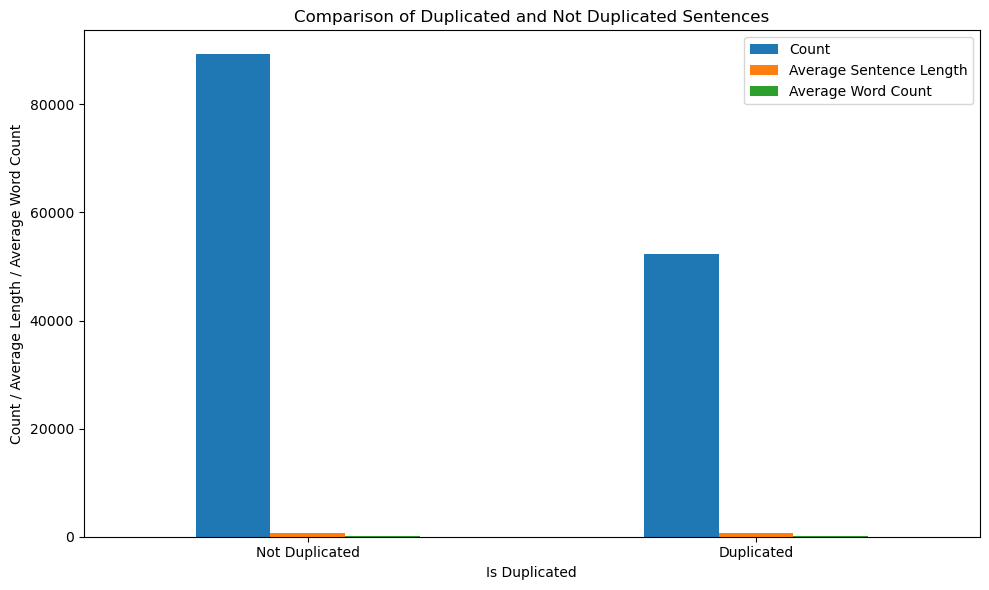

In [9]:
analysis_1_0('quora-train.csv', 'train.csv')

    similarity  count  Avg Sentence Length Difference  avg_word_count
0        0.000     59                        2.254237        2.050847
1        0.200     11                        8.636364        2.545455
2        0.231      1                        1.000000        2.000000
3        0.250      2                        6.500000        2.000000
4        0.300      1                        0.000000        2.000000
..         ...    ...                             ...             ...
57       4.600     17                        1.235294        5.411765
58       4.750      4                        4.750000       12.000000
59       4.800     22                        1.227273        6.090909
60       4.875      1                        4.000000        4.000000
61       5.000     52                        0.307692        5.480769

[62 rows x 4 columns]


<Figure size 10000x60000 with 0 Axes>

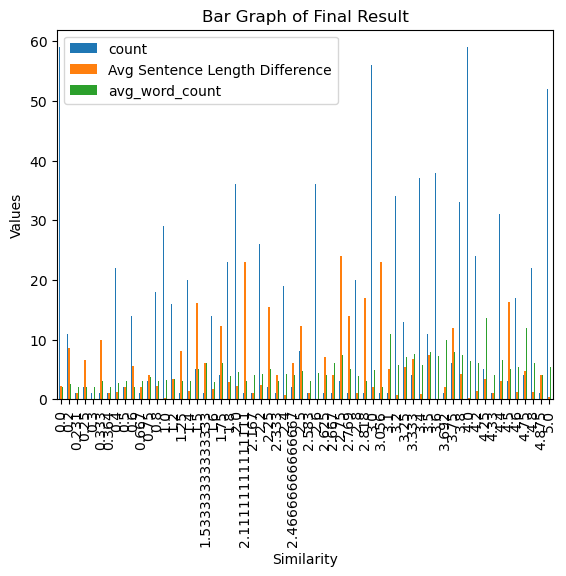

In [10]:
analysis_similarity('sts-dev.csv', 'Analysis_sts-dev.csv')

    similarity  count  Avg Sentence Length Difference  avg_word_count
0        0.000     59                        2.254237        2.050847
1        0.200     11                        8.636364        2.545455
2        0.231      1                        1.000000        2.000000
3        0.250      2                        6.500000        2.000000
4        0.300      1                        0.000000        2.000000
..         ...    ...                             ...             ...
57       4.600     17                        1.235294        5.411765
58       4.750      4                        4.750000       12.000000
59       4.800     22                        1.227273        6.090909
60       4.875      1                        4.000000        4.000000
61       5.000     52                        0.307692        5.480769

[62 rows x 4 columns]


<Figure size 10000x60000 with 0 Axes>

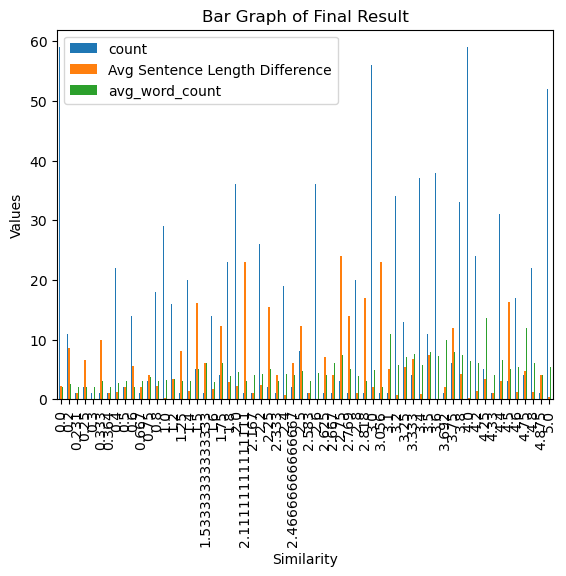

In [11]:
analysis_similarity('sts-train.csv', 'Analysis_sts-train.csv')

In [12]:
df = pd.read_csv('finetune-sst-dev-out.csv', delimiter = '\t')
print(df)



                                 id    Predicted_Sentiment 
0     a7d575c9ed86ea9633660c67e , 4                     NaN
1     33cfa32975091f471e3a19656 , 2                     NaN
2     266dc1a26e2654235e8d8dd22 , 4                     NaN
3     9ab97ed33b3aae716a099a622 , 4                     NaN
4     b9a4de27c4cb2a0f8fa220747 , 3                     NaN
...                              ...                    ...
1096  7268beb9989f19b75e1395ec5 , 2                     NaN
1097  54276f810c53354928acf961a , 1                     NaN
1098  a6744ae0fdcf6e2edf582f6c6 , 1                     NaN
1099  8a5012744199a4ea506bc96df , 1                     NaN
1100  1ae91087064d5035fe6c0c63f , 0                     NaN

[1101 rows x 2 columns]


In [13]:
import pandas as pd
import random
import string

def generate_random_string(length):
    characters = string.ascii_letters + string.digits
    random_string = ''.join(random.choice(characters) for _ in range(length))
    return random_string

data = {
    'id': [generate_random_string(21) for _ in range(10)],
    'sentiment': [random.choice([1, 2, 3, 4, 5]) for _ in range(10)]
}

data = pd.DataFrame(data)
column_to_copy = data['id'].copy()
random.shuffle(column_to_copy)  # Shuffle the list in place

pred_data = {
    'id': column_to_copy,
    'predicted': [random.uniform(0, 5) for _ in range(10)]
}

pred_data = pd.DataFrame(pred_data)

print(data)
print(pred_data)


                      id  sentiment
0  ivC4hdE1TSyEj4xBv7tAG          2
1  BqlvwmiTQz7AX2YaiBHcL          4
2  Xrcn1l0565VB5pUVKRd3I          2
3  L3Alfef7vOisbrzXUVB47          5
4  TEwBom4PHEguPuCKocETH          3
5  PIAhCHNorLKTDQXj7p1Br          2
6  UvumJvnrjNo63RsQjtohd          3
7  vhHqimedsJLnJ0wFrT35t          2
8  8K0gzYKDChbUsFBn2Lcgs          5
9  4QjM4x4pwj9dy7YOCui0g          5
                      id  predicted
0  8K0gzYKDChbUsFBn2Lcgs   2.862783
1  BqlvwmiTQz7AX2YaiBHcL   1.393561
2  Xrcn1l0565VB5pUVKRd3I   0.311789
3  UvumJvnrjNo63RsQjtohd   1.890295
4  4QjM4x4pwj9dy7YOCui0g   1.971580
5  L3Alfef7vOisbrzXUVB47   0.018274
6  PIAhCHNorLKTDQXj7p1Br   3.627297
7  vhHqimedsJLnJ0wFrT35t   3.480438
8  ivC4hdE1TSyEj4xBv7tAG   4.501757
9  TEwBom4PHEguPuCKocETH   3.901404


In [14]:
import pandas as pd
import random
import string

def generate_random_string(length):
    characters = string.ascii_letters + string.digits
    random_string = ''.join(random.choice(characters) for _ in range(length))
    return random_string

data = {
    'id': [generate_random_string(21) for _ in range(10)],
    'sentiment': [random.choice([1, 2, 3, 4, 5]) for _ in range(10)]
}

data = pd.DataFrame(data)
column_to_copy = data['id'].copy()
random.shuffle(column_to_copy)

pred_data = {
    'id': column_to_copy,
    'predicted': [random.uniform(0, 5) for _ in range(10)]
}

pred_data = pd.DataFrame(pred_data)

# Merge data and pred_data based on the 'id' column
merged_data = pd.merge(data, pred_data, on='id')


print(data)
print(pred_data)
print(merged_data)


                      id  sentiment
0  XXYlcEHo7Y2zfF8a0I3Y7          4
1  MExwYaYUrz4AbWw4Xa5RY          4
2  Q8csdZhtpx121ri0nA8lU          1
3  NrHmkM6X6VXN5VaKeru7L          1
4  fEOtSRVlJBNULz8WGloAR          4
5  aCFV2wYRN3XfSPGcXBh0Y          4
6  XZzA0ekuecTn2XIdCrBhk          1
7  V9JmX6rxKjG2yGsd7le60          3
8  ExTmz2ref63Po0n5Cy3TX          1
9  bRU7wK4oQCUAU2BOIVDQR          5
                      id  predicted
0  XZzA0ekuecTn2XIdCrBhk   3.923873
1  ExTmz2ref63Po0n5Cy3TX   2.671439
2  NrHmkM6X6VXN5VaKeru7L   1.490458
3  V9JmX6rxKjG2yGsd7le60   4.397788
4  aCFV2wYRN3XfSPGcXBh0Y   1.779311
5  fEOtSRVlJBNULz8WGloAR   0.590843
6  XXYlcEHo7Y2zfF8a0I3Y7   4.321837
7  MExwYaYUrz4AbWw4Xa5RY   3.088674
8  Q8csdZhtpx121ri0nA8lU   1.740378
9  bRU7wK4oQCUAU2BOIVDQR   4.999972
                      id  sentiment  predicted
0  XXYlcEHo7Y2zfF8a0I3Y7          4   4.321837
1  MExwYaYUrz4AbWw4Xa5RY          4   3.088674
2  Q8csdZhtpx121ri0nA8lU          1   1.740378
3  NrHmkM6X6VXN5VaKe

# Classify in six Classes of Similarity [0,1,2,3,4,5]:

In [15]:
data = {
        'similarity' : sorted([random.uniform(0, 6) for _ in range(100)]),
        'count' : [random.choice([22,11,33,53,76,98,4,12,54,67,32,15,37,92,26,56]) for _ in range(100)],
        'Avg Sentence Length Difference' : [random.uniform(0, 100) for _ in range(100)],
        'avg_word_count' : [random.uniform(0, 20) for _ in range(100)]
}

data = pd.DataFrame(data)
print(data)

    similarity  count  Avg Sentence Length Difference  avg_word_count
0     0.016655     32                       70.412682        7.660174
1     0.187651     53                       83.449511        4.045556
2     0.323238     12                       72.354036       10.751050
3     0.328949      4                       69.602969       16.980619
4     0.330127     15                       23.200515       14.354777
..         ...    ...                             ...             ...
95    5.539179     53                       83.451132        6.486177
96    5.545739     76                       57.904274        4.062475
97    5.767674     98                       72.926416        9.240659
98    5.859437     56                       89.184337        6.161718
99    5.928480     56                       67.228690        7.315092

[100 rows x 4 columns]


In [16]:
import pandas as pd

# Creating a sample DataFrame
df = pd.read_csv('Analysis_sts-dev.csv', delimiter=',')
print(df)
# Retrieving a row by index (0-based)


number_of_rows = df.shape[0]
number_of_column = df.shape[1]

for row_index in range(df.shape[0]):
    row_series = df.iloc[row_index] # take the row with the row_index
    row_list = row_series.tolist()  # Converting the Series to a list
    for i in range(1,5):
        avg_count = 0
        avg_avg_length = 0 
        avg_avg_word_count = 0
        if (i-1<=row_list[0] < i) or (row_list[0]==5):
            avg_count = avg_count + row_list[1]
            avg_avg_length = avg_avg_length + row_list[2]
            avg_avg_word_count = avg_avg_word_count + row_list[3]

            
print("Retrieved row as a list:")
print(row_list)

    similarity  count  Avg Sentence Length Difference  avg_word_count
0        0.000     59                        2.254237        2.050847
1        0.200     11                        8.636364        2.545455
2        0.231      1                        1.000000        2.000000
3        0.250      2                        6.500000        2.000000
4        0.300      1                        0.000000        2.000000
..         ...    ...                             ...             ...
57       4.600     17                        1.235294        5.411765
58       4.750      4                        4.750000       12.000000
59       4.800     22                        1.227273        6.090909
60       4.875      1                        4.000000        4.000000
61       5.000     52                        0.307692        5.480769

[62 rows x 4 columns]
Retrieved row as a list:
[5.0, 52.0, 0.3076923076923066, 5.480769230769231]


In [17]:
import pandas as pd
import random

# Creating the DataFrame
data = {
    'similarity': sorted([random.uniform(0, 5) for _ in range(15)]),
    'count': [random.choice([22, 11, 33, 53, 76, 98, 4, 12, 54, 67, 32, 15, 37, 92, 26, 56]) for _ in range(15)],
    'Avg Sentence Length Difference': [random.uniform(0, 100) for _ in range(15)],
    'avg_word_count': [random.uniform(0, 20) for _ in range(15)]
}

data = pd.DataFrame(data)

# Classify similarity into classes
num_classes = 6
class_labels = [i for i in range(num_classes)]
data['similarity_class'] = pd.cut(data['similarity'], bins=num_classes, labels=class_labels)

# Group by similarity_class and calculate averages
grouped_data = data.groupby('similarity_class').agg({
    'count': 'mean',
    'Avg Sentence Length Difference': 'mean',
    'avg_word_count': 'mean'
}).reset_index()


print(data)
print(grouped_data)


    similarity  count  Avg Sentence Length Difference  avg_word_count   
0     0.204789     92                       55.657582       17.148495  \
1     0.694856     56                       92.916915       14.100425   
2     0.786116     12                       56.221924        4.161937   
3     1.744627     15                       88.733772       19.319811   
4     2.095275     33                       25.466636       12.905473   
5     2.391575      4                       20.160430        5.251546   
6     2.396053     98                       98.163482       10.746615   
7     2.911379      4                       76.001248       12.999392   
8     3.017168      4                       37.046579       19.293279   
9     3.018925      4                       29.143395       11.859812   
10    3.170671     53                       52.335614       16.732307   
11    3.242020     53                       20.881227       15.320057   
12    4.153953     22                       30.9219

In [18]:
(32+11+67+76)/5

37.2

In [19]:
import pandas as pd
import random

data = pd.read_csv('Analysis_sts-dev.csv', delimiter=',')

# Define the ranges for initial splitting
similarity_ranges = [(i, i + 1) for i in range(1, 6)]

# Initialize a dictionary to store the splitted DataFrames
splitted_dataframes = {}

# Split the data into different DataFrames based on the initial similarity ranges
for j, (lower, upper) in enumerate(similarity_ranges, start=1):
    splitted_dataframes[f'data_{j}'] = data[(data['similarity'] >= lower) & (data['similarity'] < upper)]

# Initialize a dictionary to store the final splitted DataFrames
final_splitted_dataframes = {}

# Split each of the previously splitted DataFrames further
for df_name, df in splitted_dataframes.items():
    sub_dataframes = {}
    for j in range(0, 6):
        sub_df_name = f'{df_name}_sub_{j}'
        if j < 5:
            sub_dataframes[sub_df_name] = df[(df['similarity'] >= j + 0.5) & (df['similarity'] < j + 1.5)]
        else:
            sub_dataframes[sub_df_name] = df[(df['similarity'] >= j + 0.5)]
    final_splitted_dataframes[df_name] = sub_dataframes

# Print the final splitted DataFrames
for df_name, sub_dataframes in final_splitted_dataframes.items():
    print(f"{df_name}:")
    for sub_df_name, sub_df in sub_dataframes.items():
        print(f"  {sub_df_name}:\n{sub_df}\n")


data_1:
  data_1_sub_0:
    similarity  count  Avg Sentence Length Difference  avg_word_count
13        1.00     29                        0.206897        3.206897
14        1.20     16                        3.312500        3.375000
15        1.25      1                        8.000000        3.000000
16        1.40     20                        1.450000        3.050000

  data_1_sub_1:
    similarity  count  Avg Sentence Length Difference  avg_word_count
17    1.500000      5                       16.200000        5.000000
18    1.533333      1                        6.000000        6.000000
19    1.600000     14                        1.785714        2.928571
20    1.750000      4                       12.250000        6.000000
21    1.800000     23                        2.869565        3.956522

  data_1_sub_2:
Empty DataFrame
Columns: [similarity, count, Avg Sentence Length Difference, avg_word_count]
Index: []

  data_1_sub_3:
Empty DataFrame
Columns: [similarity, count, Avg Sen

In [20]:
import pandas as pd
import random

data = pd.read_csv('Analysis_sts-dev.csv', delimiter=',')

# Define the ranges for initial splitting
similarity_ranges = [(i, i + 1) for i in range(1, 6)]

# Initialize a dictionary to store the splitted DataFrames
splitted_dataframes = {}

# Split the data into different DataFrames based on the initial similarity ranges
for j, (lower, upper) in enumerate(similarity_ranges, start=1):
    splitted_dataframes[f'data_{j}'] = data[(data['similarity'] >= lower) & (data['similarity'] < upper)]

# Initialize a dictionary to store the final splitted DataFrames
final_splitted_dataframes = {}

# Split each of the previously splitted DataFrames further
for df_name, df in splitted_dataframes.items():
    sub_dataframes = {}
    for j in range(0, 6):
        sub_df_name = f'{df_name}_sub_{j}'
        if j < 5:
            sub_data = df[(df['similarity'] >= j + 0.5) & (df['similarity'] < j + 1.5)]
        else:
            sub_data = df[(df['similarity'] >= j + 0.5)]
        
        if not sub_data.empty:  # Check if the DataFrame is not empty
            sub_dataframes[sub_df_name] = sub_data
    
    if sub_dataframes:  # Check if there are non-empty sub-DataFrames
        final_splitted_dataframes[df_name] = sub_dataframes

# Print the final splitted DataFrames
for df_name, sub_dataframes in final_splitted_dataframes.items():
    print(f"{df_name}:")
    for sub_df_name, sub_df in sub_dataframes.items():
        print(f"  {sub_df_name}:\n{sub_df}\n")


data_1:
  data_1_sub_0:
    similarity  count  Avg Sentence Length Difference  avg_word_count
13        1.00     29                        0.206897        3.206897
14        1.20     16                        3.312500        3.375000
15        1.25      1                        8.000000        3.000000
16        1.40     20                        1.450000        3.050000

  data_1_sub_1:
    similarity  count  Avg Sentence Length Difference  avg_word_count
17    1.500000      5                       16.200000        5.000000
18    1.533333      1                        6.000000        6.000000
19    1.600000     14                        1.785714        2.928571
20    1.750000      4                       12.250000        6.000000
21    1.800000     23                        2.869565        3.956522

data_2:
  data_2_sub_1:
    similarity  count  Avg Sentence Length Difference  avg_word_count
22    2.000000     36                        2.194444        4.527778
23    2.111111      1   

In [21]:
import pandas as pd
import random

def Analysis_on_analysed_similarity(path, save_path):
    # Creating the DataFrame
    data = pd.read_csv(path, delimiter=',')
    # Define the ranges for initial splitting
    similarity_ranges = [(i, i + 1) for i in range(0, 6)]

    # Initialize a dictionary to store the splitted DataFrames
    splitted_dataframes = {}

    # Split the data into different DataFrames based on the initial similarity ranges
    for j, (lower, upper) in enumerate(similarity_ranges, start=1):
        splitted_dataframes[f'data_{j}'] = data[(data['similarity'] >= lower) & (data['similarity'] < upper)]

    # Initialize a dictionary to store the final splitted DataFrames
    final_splitted_dataframes = {}

    # Split each of the previously splitted DataFrames further
    for df_name, df in splitted_dataframes.items():
        sub_dataframes = {}
        for j in range(-1, 6):
            sub_df_name = f'{df_name}_sub_{j}'
            if j < 5:
                sub_data = df[(df['similarity'] >= j + 0.5) & (df['similarity'] < j + 1.5)]
            else:
                sub_data = df[(df['similarity'] >= j + 0.5)]

            if not sub_data.empty:  # Check if the DataFrame is not empty
                sub_dataframes[sub_df_name] = sub_data

        if sub_dataframes:  # Check if there are non-empty sub-DataFrames
            final_splitted_dataframes[df_name] = sub_dataframes


    # Perform analysis and create the 'result' DataFrame
    result_data = []

    for df_name, sub_dataframes in final_splitted_dataframes.items():
        for sub_df_name, sub_df in sub_dataframes.items():
            mean_similarity = sub_df['similarity'].mean()
            mean_count = sub_df['count'].mean()
            mean_avg_sentence_length_diff = sub_df['Avg Sentence Length Difference'].mean()
            mean_avg_word_count = sub_df['avg_word_count'].mean()

            result_data.append([mean_similarity, mean_count, mean_avg_sentence_length_diff, mean_avg_word_count])

    result_columns = ['mean similarity', 'mean count', 'mean Avg Sentence Length Difference', 'mean avg_word_count']
    result_df = pd.DataFrame(result_data, columns=result_columns)


    # Save 
    result_df.to_csv(save_path, index=False)
    # Print the 'result' DataFrame
    print("result:")
    print(result_df)
    
    # Set the figure size to enlarge the x-axis
    plt.figure(figsize=(10, 6))

    # Plot a bar graph
    result_df.plot(x='mean similarity', kind='bar')
    plt.ylabel('Values')  # Set y-axis label
    plt.xlabel('mean similarity')  # Set x-axis label
    plt.title('Bar Graph of Final Result')  # Set title

    plt.show()  # Show the plot
    


result:
    mean similarity  mean count  mean Avg Sentence Length Difference   
0          0.259750   12.250000                             3.815871  \
1          0.663400    7.600000                             3.173016   
2          1.212500   16.500000                             3.242349   
3          1.636667    9.400000                             7.821056   
4          2.240972   11.000000                             6.850216   
5          2.679111    8.000000                             8.919753   
6          3.191286   20.857143                             6.263472   
7          3.668400   17.800000                             5.149920   
8          4.236000   24.000000                             1.823694   
9          4.705000    9.400000                             5.509180   
10         5.000000   52.000000                             0.307692   

    mean avg_word_count  
0              2.284765  
1              2.955556  
2              3.157974  
3              4.777019

<Figure size 1000x600 with 0 Axes>

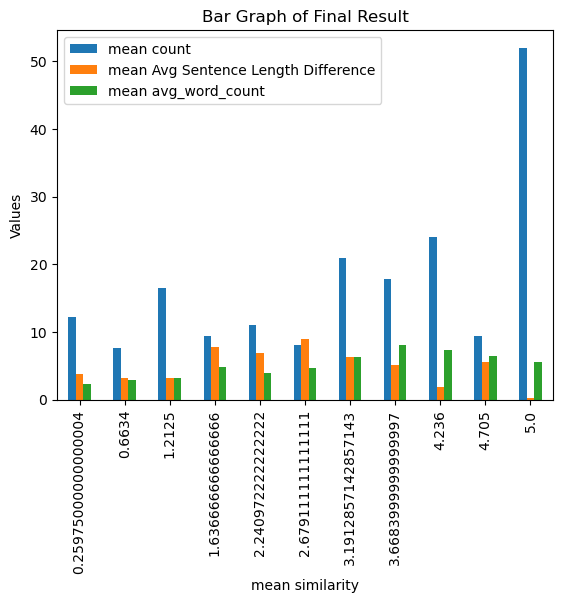

In [22]:
Analysis_on_analysed_similarity('Analysis_sts-dev.csv', 'Analysis_on_analysed_similarity-dev.csv')

In [76]:
def merge_and_save(path_1, path_2):
    data_1 = pd.read_csv(path_1, delimiter='\t')
    data_2 = pd.read_csv(path_2, delimiter=',')
    column_name = data_1.columns[-1]
    #merged_data = pd.merge(data_1, data_2, on=column_name)
    merged_data = pd.merge(data_1, data_2)
    print("\nMerged Data:")
    print(merged_data)
    save_path = f"merged_{path_1}_{path_2}.csv" 
    merged_data.to_csv(save_path, index=False)
    print(f"Merged data saved to {save_path}")

In [72]:
def merge_and_save(path_1, path_2):
    data_1 = pd.read_csv(path_1, delimiter='\t')
    data_2 = pd.read_csv(path_2, delimiter=',')
    
    if data_1.iloc[:, 0].equals(data_2.iloc[:, 0]):
        column_name = str((data_1.columns)[-1])
        merged_data = pd.merge(data_1, data_2, left_on=column_name, right_on=column_name)
        print("\nMerged Data:")
        print(merged_data)
        # Save the merged dataset to a new CSV file
        save_path = f'merged_{path_1}_{path_2}.csv' 
        merged_data.to_csv(save_path, index=False)
    else:
        print("Error: First columns of the DataFrames are not equal.")

In [77]:
merge_and_save('quora-dev.csv','CenterMatrixLinearSelfAttentionWithSparsemax-para-dev-output.csv')


Merged Data:
       Unnamed: 0                         id   
0          290564  fbfddc56315fb8a39e7608fa0  \
1          318737  318658e273ac78f3b1e957b8b   
2          400012  b229a7f7a7b661a8a92f970cf   
3          346961  6d1af8d3227bcb1f12e5fd17f   
4          103882  8e17f5f485c42beec87bbe341   
...           ...                        ...   
20207      287156  66a81f1fb357b3a02cf56af53   
20208      374866  97caffa7ec889385d3aa3a761   
20209      222710  d7111c39ead9759d48cd7cf4b   
20210      272833  d8511a7a0514299f18fcef14d   
20211      111373  43fb8a68c4664400b42db7f83   

                                               sentence1   
0       What can you get as a customer of Star Alliance?  \
1      "Which is correct grammar: I graduated from Un...   
2                                  What makes one angry?   
3      What can Trump realistically do for America (i...   
4      I have 95% in 10th, 95% in 12th and CGPA 7.8 i...   
...                                              

In [88]:
# Let it be filterd
def filter_rows(path):
    data = pd.read_csv(path, delimiter=',')
    filtered_data = data[data.iloc[:, -2] != data.iloc[:, -1]]
    
    save_path = f"filtered_{path}"  
    filtered_data.to_csv(save_path, index=False)
    
    print("Filtered Data:")
    print(filtered_data)
    
    return filtered_data
filter_rows('merged_quora-dev.csv_CenterMatrixLinearSelfAttentionWithSparsemax-para-dev-output.csv.csv')

Filtered Data:
       Unnamed: 0                         id   
0          290564  fbfddc56315fb8a39e7608fa0  \
2          400012  b229a7f7a7b661a8a92f970cf   
16         395120  22dd0c5415fbb943b926ba4ba   
17         356351  4c2a17fe7cd2414a9fbda500f   
36         166049  814d74216df24199c51042a60   
...           ...                        ...   
20196       59679  53934b683181187c1fae163df   
20200      110798  8a59dc551b6edc84b628bf6a9   
20204      356871  fa0951604da3224ac9b1a5a45   
20205       29279  f377228d3d976578380be895e   
20209      222710  d7111c39ead9759d48cd7cf4b   

                                               sentence1   
0       What can you get as a customer of Star Alliance?  \
2                                  What makes one angry?   
16     How can I update my Android KitKat 4.4.4 to Lo...   
17     I want to travel to Dubai. What are the best h...   
36     What are the best and profitable ways for savi...   
...                                             

,Unnamed: 0,id,sentence1,sentence2,is_duplicate,Predicted_Is_Paraphrase
0,290564,fbfddc56315fb8a39e7608fa0,What can you get as a customer of Star Alliance?,What are some ways to register with Star Allia...,0.0,1.0
2,400012,b229a7f7a7b661a8a92f970cf,What makes one angry?,What is the one thing that makes you most angry?,1.0,0.0
16,395120,22dd0c5415fbb943b926ba4ba,How can I update my Android KitKat 4.4.4 to Lo...,Can I upgrade the Samsung Galaxy KitKat 4.4 to...,0.0,1.0
17,356351,4c2a17fe7cd2414a9fbda500f,I want to travel to Dubai. What are the best h...,What are the best hotels on Dubai?,1.0,0.0
36,166049,814d74216df24199c51042a60,What are the best and profitable ways for savi...,What are your best ways to save money?,0.0,1.0
...,...,...,...,...,...,...
20196,59679,53934b683181187c1fae163df,Are daily push ups unhealthy?,Are daily push ups harmful?,1.0,0.0
20200,110798,8a59dc551b6edc84b628bf6a9,What do women love most about men?,"Do men know more about women, or do women know...",0.0,1.0
20204,356871,fa0951604da3224ac9b1a5a45,How can I be a singer like Enrique Iglesias?,How can I be a singer like Enrique?,1.0,0.0
20205,29279,f377228d3d976578380be895e,What are the latest exciting hollywood movies?,What's the latest Hollywood movie?,1.0,0.0


In [89]:
2211 -134

2077